| Column | Description | Data Type | Example |
| ------ | ----------- | --------- | ------- |
| PassengerId | A unique Id for each passenger. | object | 0001_01 |
| CryoSleep | Indicates if the passenger was in suspended animation during the voyage. | int64 | 0 |
| VIP | Whether the passenger has paid for special VIP service. | int64 | 0 |
| Transported | Whether the passenger was transported to another dimension (target variable). | bool | False |
| HomePlanet_Earth | The planet the passenger departed from - Earth. | float64 | 0.0 |
| HomePlanet_Europa | The planet the passenger departed from - Europa. | float64 | 1.0 |
| HomePlanet_Mars | The planet the passenger departed from - Mars. | float64 | 0.0 |
| Destination_55 Cancri e | The destination planet of the passenger - 55 Cancri e. | float64 | 0.0 |
| Destination_PSO J318.5-22 | The destination planet of the passenger - PSO J318.5-22. | float64 | 0.0 |
| Destination_TRAPPIST-1e | The destination planet of the passenger - TRAPPIST-1e. | float64 | 1.0 |
| Age | The age of the passenger. | float64 | 0.493671 |
| RoomService | Amount billed for room service. | float64 | 0.0 |
| FoodCourt | Amount billed at the food court. | float64 | 0.0 |
| ShoppingMall | Amount billed at the shopping mall. | float64 | 0.0 |
| Spa | Amount billed at the spa. | float64 | 0.0 |
| VRDeck | Amount billed at the VR deck. | float64 | 0.0 |
| Deck | Cabin deck information. | object | B |
| Num | Cabin number. | object | 0 |
| Side | Cabin side (P for Port or S for Starboard). | object | P |
| Group | Group information from PassengerId. | object | 0001 |

In [60]:
import pandas as pd
import numpy as np
# os 는 데이터를 저장 후 가져왔기 때문에 사용하지 않음

In [61]:
train_data = pd.read_csv('./spaceship-titanic/train.csv')
test_data = pd.read_csv('./spaceship-titanic/test.csv')

y_data = train_data.pop('Transported')


In [62]:
train_data.head()
#train_data.info() #8693 14

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [63]:
test_data.head()
#test_data.info() # 4277 13 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [64]:
y_data

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [65]:
#전처리를 위한 합치기
total_data = pd.concat([train_data, test_data]).reset_index(drop=True)
total_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [66]:
#전처리 하기
#Ver 1. 관련 없는 데이터 버리기
#버릴 데이터 선택
#PassengerId 승객 고유 ID 차원 이송과는 상관 없는 데이터
#Name 승객의 이름은 차원 이송과는 상관 없은 데이터

total_data.drop(columns=['PassengerId','Name'], inplace=True)
total_data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
12966,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
12967,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
12968,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [67]:
#Ver 2. 관련성이 큰 데이터 묶기
#돈과 관련된 데이터 VIP,,RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
money_data = pd.concat([y_data,total_data[['VIP','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]], axis=1)
money_data.head()

,Transported,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,False,False,0.0,0.0,0.0,0.0,0.0
1,True,False,109.0,9.0,25.0,549.0,44.0
2,False,True,43.0,3576.0,0.0,6715.0,49.0
3,False,False,0.0,1283.0,371.0,3329.0,193.0
4,True,False,303.0,70.0,151.0,565.0,2.0


In [68]:
money_data.corr()
# Y와의 상관관계 RoomService -0.244611 Spa -0.221131 VRDeck -0.207075 로 나미진 0.1 이하 이므로 전처리 데이터 삭제

,Transported,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,1.000000,-0.037650,-0.244611,0.046566,0.010141,-0.221131,-0.207075
VIP,-0.037650,1.000000,0.060926,0.128288,0.024289,0.082750,0.113856
RoomService,-0.244611,0.060926,1.000000,-0.020146,0.057402,0.008936,-0.023847
FoodCourt,0.046566,0.128288,-0.020146,1.000000,-0.001589,0.228990,0.244279
ShoppingMall,0.010141,0.024289,0.057402,-0.001589,1.000000,0.010504,0.004485
Spa,-0.221131,0.082750,0.008936,0.228990,0.010504,1.000000,0.149874
VRDeck,-0.207075,0.113856,-0.023847,0.244279,0.004485,0.149874,1.000000


In [69]:
total_data.drop(columns=['VIP','FoodCourt','ShoppingMall'], inplace=True)
total_data

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,565.0,2.0
...,...,...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,34.0,0.0,0.0,0.0
12966,Earth,False,NaN,TRAPPIST-1e,42.0,0.0,10.0,144.0
12967,Mars,True,D/296/P,55 Cancri e,NaN,0.0,0.0,0.0
12968,Europa,False,D/297/P,NaN,NaN,0.0,0.0,523.0


In [70]:
#결측치 제거 및 열 정리 및 원핫인코딩
#결측치 확인
total_data.isnull().sum()

HomePlanet     288
CryoSleep      310
Cabin          299
Destination    274
Age            270
RoomService    263
Spa            284
VRDeck         268
dtype: int64

In [71]:
total_data[['Deck', 'Num', 'Side']] = total_data['Cabin'].str.split('/', expand=True)
total_data[['Deck', 'Side']] = total_data[['Deck', 'Side']].fillna(value='X') # 결측치 X로 처리
total_data.drop(columns=["Cabin", "Num"], inplace=True) #의미없는 값과 분해 열 삭제

In [72]:
total_data.isnull().sum()

HomePlanet     288
CryoSleep      310
Destination    274
Age            270
RoomService    263
Spa            284
VRDeck         268
Deck             0
Side             0
dtype: int64

In [73]:
#결측치 채우기 실수 - 평균, 문자+불 - 최빈
lst = list(total_data)
for values in lst:
    if type(total_data[values][0]) == str or type(total_data[values][0]) == bool:
        total_data[values] = total_data[values].fillna(total_data[values].mode()[0])
    if type(total_data[values][0]) == np.float64:
        total_data[values] = total_data[values].fillna(total_data[values].mean())

C:\Users\user\AppData\Local\Temp\ipykernel_13324\1240047556.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  total_data[values] = total_data[values].fillna(total_data[values].mode()[0])


In [74]:
total_data.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
RoomService    0
Spa            0
VRDeck         0
Deck           0
Side           0
dtype: int64

In [75]:
df = pd.get_dummies(total_data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'Deck', 'Side' ], dtype=float)
df.head()

,Age,RoomService,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,Side_P,Side_S,Side_X
0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,24.0,109.0,549.0,44.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,58.0,43.0,6715.0,49.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33.0,0.0,3329.0,193.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16.0,303.0,565.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
from sklearn.preprocessing import MinMaxScaler

# Normalization - 데이터 스케일 정규화
columns_to_normalize = ['RoomService', 'Spa', 'VRDeck']

scaler = MinMaxScaler() # 최소 최대 정규화


df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

,Age,RoomService,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,Side_P,Side_S,Side_X
0,39.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,24.0,0.007608,0.024500,0.001823,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,58.0,0.003001,0.299670,0.002030,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33.0,0.000000,0.148563,0.007997,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16.0,0.021149,0.025214,0.000083,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
# 전처리 후 train , test 데이터 분리
train_data = df[:8693]
test_data = df[8693:]

In [82]:
test_data

,Age,RoomService,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,Side_P,Side_S,Side_X
8693,27.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8694,19.000000,0.000000,0.125982,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8695,31.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8696,38.000000,0.000000,0.008077,0.024241,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8697,20.000000,0.000698,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,34.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12966,42.000000,0.000000,0.000446,0.005967,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12967,28.771969,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12968,28.771969,0.000000,0.000000,0.021672,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
#데이터 정리
X = train_data
Y = y_data
X

,Age,RoomService,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,Side_P,Side_S,Side_X
0,39.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,24.0,0.007608,0.024500,0.001823,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,58.0,0.003001,0.299670,0.002030,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33.0,0.000000,0.148563,0.007997,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16.0,0.021149,0.025214,0.000083,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.000000,0.073322,0.003066,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8689,18.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8690,26.0,0.000000,0.000045,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8691,32.0,0.000000,0.015753,0.134049,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
# 모델 학습
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=350, max_depth=10, random_state=1)
model.fit(X,Y)

predictions = model.predict(test_data)

Feature importance ranking:
1. Spa: 0.14929878729343388
2. CryoSleep_True: 0.14232867789103146
3. VRDeck: 0.13842052436970406
4. CryoSleep_False: 0.13766989136228797
5. RoomService: 0.13253027148939137
6. Age: 0.08563786195292662
7. HomePlanet_Earth: 0.032611011707782744
8. HomePlanet_Europa: 0.03132285561913142
9. Deck_G: 0.018476799235291004
10. Deck_F: 0.017137328132778455
11. Deck_E: 0.017116827934013305
12. HomePlanet_Mars: 0.015040009013798006
13. Side_P: 0.01304438793119674
14. Side_S: 0.01293887849626325
15. Deck_C: 0.012032160961394882
16. Deck_B: 0.010966317472129637
17. Destination_55 Cancri e: 0.009967062100225929
18. Destination_TRAPPIST-1e: 0.009412689074823961
19. Destination_PSO J318.5-22: 0.005333975031796156
20. Deck_D: 0.0035378205541026137
21. Deck_A: 0.0021214083837886193
22. Deck_X: 0.0014934480809991296
23. Side_X: 0.0014495258411621802
24. Deck_T: 0.00011148007054664392


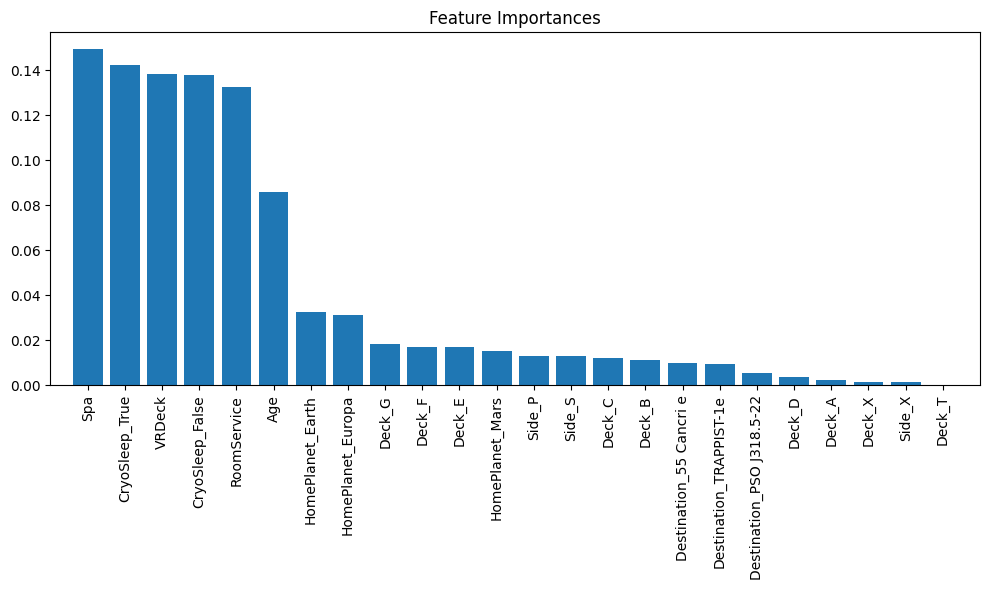

In [85]:
import matplotlib.pyplot as plt

# 특성 중요도 얻기
importances = model.feature_importances_

# 특성 중요도를 기준으로 내림차순 정렬
indices = np.argsort(importances)[::-1]

# 특성 이름과 중요도 출력
print("Feature importance ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. {X.columns[idx]}: {importances[idx]}")

# 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()